In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import math
%matplotlib inline

To make use of a function in a module we import the module with an import statement.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [90]:
df=pd.read_csv("iris.txt")
## Importing the dataset

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [93]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
df['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


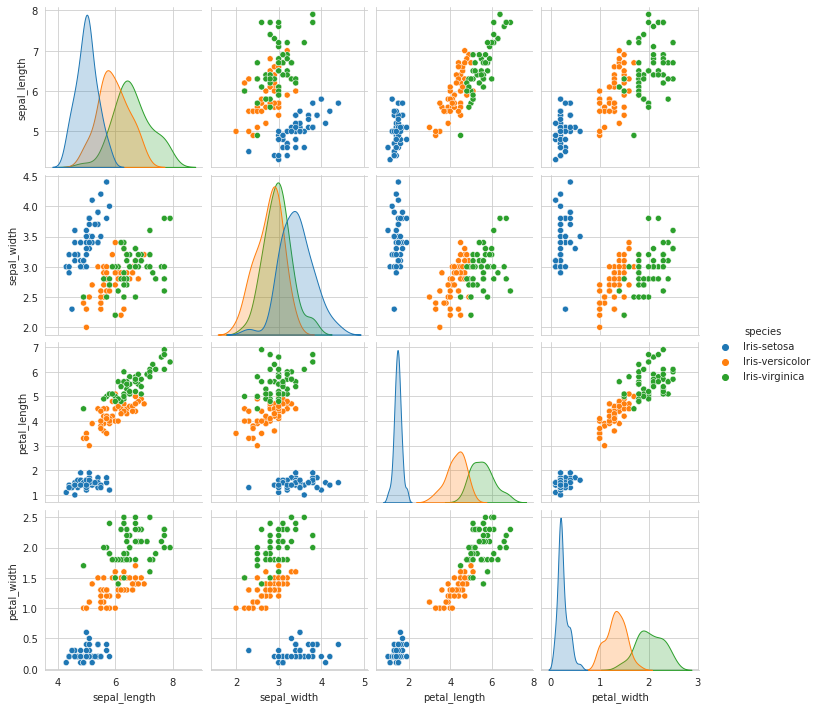

In [96]:
sns.pairplot(data=df,kind='scatter', hue='species')

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa  is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor and iris-virginica.

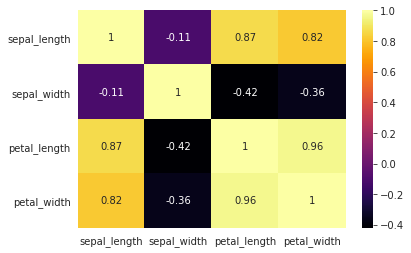

In [97]:
sns.heatmap(df.corr(),annot=True, cmap='inferno')

Heatmap plots rectangular data as a color-encoded matrix.

In [98]:
sns.set_style('whitegrid')

It is used to set the aesthetic style of the plots.

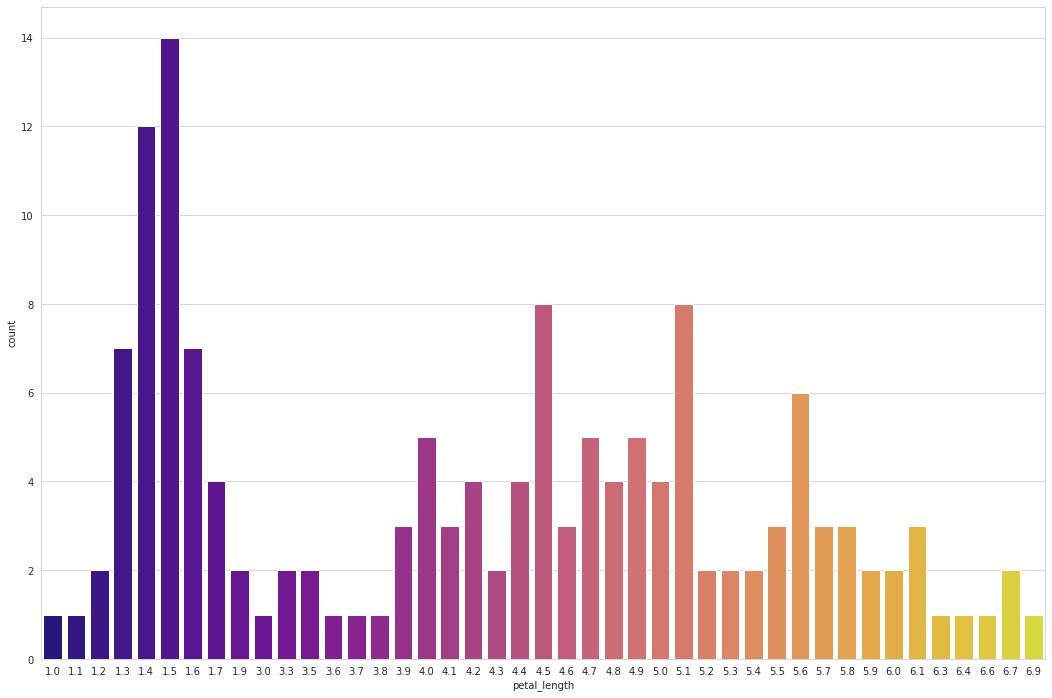

In [99]:
 plt.figure(figsize=(18,12)) 
sns.countplot(x='petal_length', data=df, palette='plasma')

It shows the counts of observations present in each categorical bin using bars.

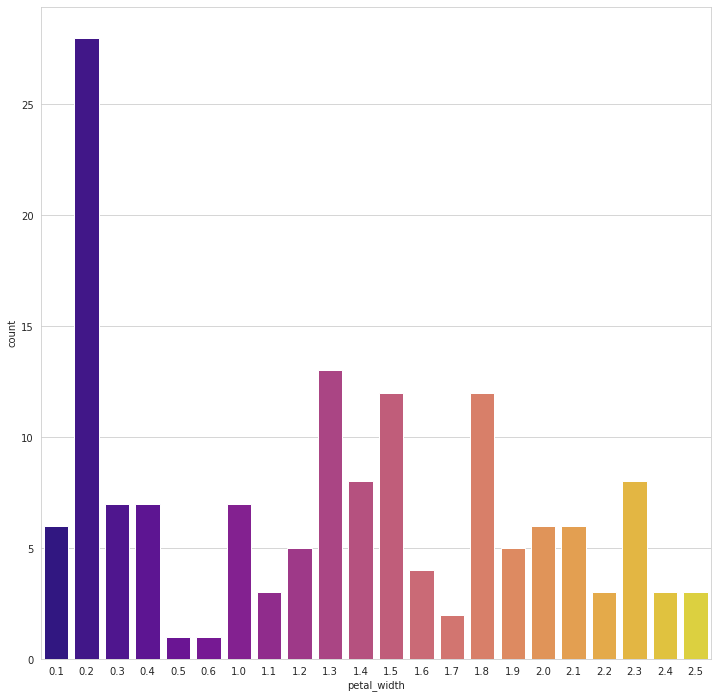

In [100]:
 plt.figure(figsize=(12,12)) 
sns.countplot(x='petal_width', data=df, palette='plasma' )

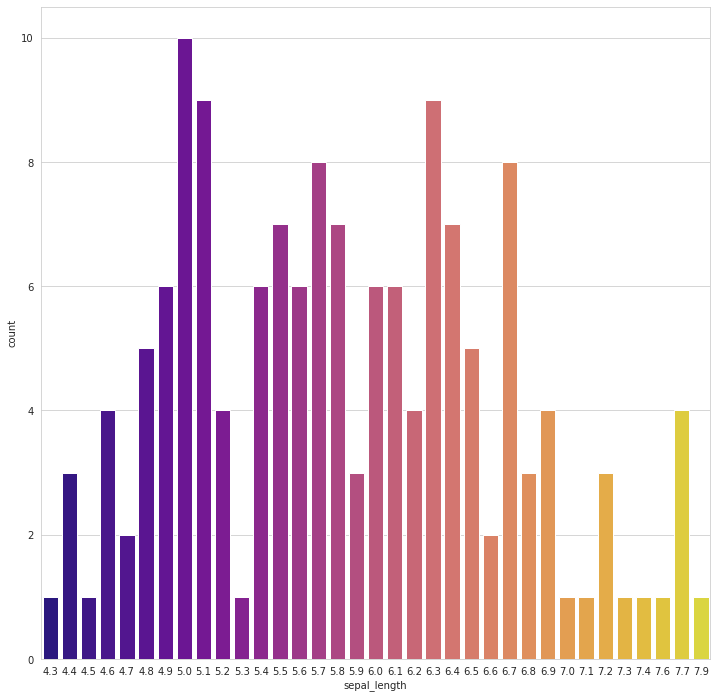

In [101]:
 plt.figure(figsize=(12,12)) 
sns.countplot(x='sepal_length', data=df, palette='plasma' )

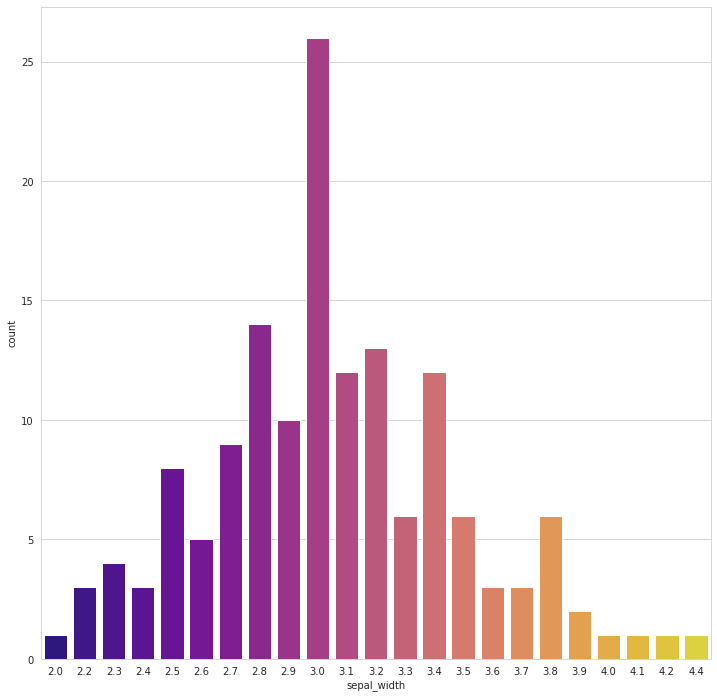

In [102]:
 plt.figure(figsize=(12,12)) 
sns.countplot(x='sepal_width', data=df, palette='plasma' )

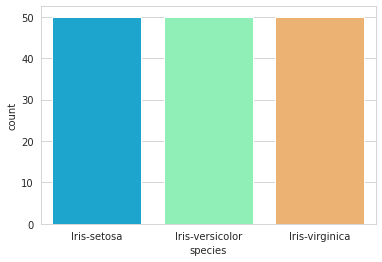

In [103]:
sns.countplot(x='species', data=df, palette='rainbow' )

In [104]:
B=df.iloc[:,0:4].values
c=df.iloc[:,4].values

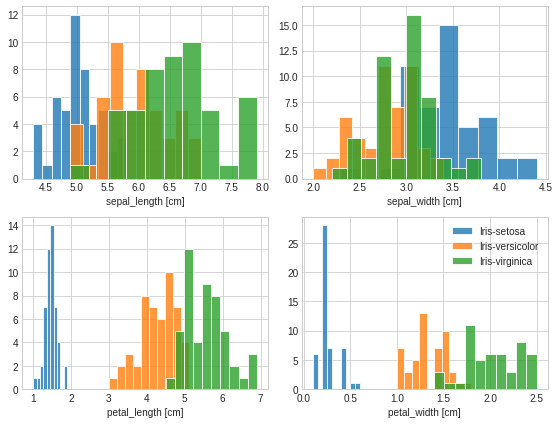

In [127]:


dict_label = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

dict_feat = {0: 'sepal_length [cm]',
                1: 'sepal_width [cm]',
                2: 'petal_length [cm]',
                3: 'petal_width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(B[c==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.8,)
        plt.xlabel(dict_feat[cnt])
    plt.legend(loc='best', fancybox=True, fontsize=10)

    plt.tight_layout()
    plt.show()

The above histogram helps us to visualize how three different flower classes are distributed along four different features.

In [106]:
iris=datasets.load_iris()
#Manually trigger loading and computation of this dataset’s data from disk into memory and return this dataset.

In [107]:
H=np.array(iris.data)
H_cov=np.cov(H, rowvar=False)
H_cov
#Prints the covariance matrix 

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [108]:
iris_covmat=pd.DataFrame(data=H_cov,columns=iris.feature_names)
iris_covmat.index=iris.feature_names
iris_covmat



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [109]:
print(H)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [128]:
print(iris_covmat)

                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           0.685694  ...          0.516271
sepal width (cm)           -0.042434  ...         -0.121639
petal length (cm)           1.274315  ...          1.295609
petal width (cm)            0.516271  ...          0.581006

[4 rows x 4 columns]


In [111]:
eigen_values,eigen_vectors=np.linalg.eig(H_cov)



In [112]:
#prints eigen vectors
eigen_vectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [113]:
#prints eigen values
eigen_values


array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [129]:
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i])for i in range (len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
print("Eigen values arranged in descending order->")
for i in eigen_pairs:
  print(i[0])

Eigen values arranged in descending order->
4.228241706034864
0.24267074792863386
0.07820950004291907
0.023835092973450024


The eigen vectors with the lowest eigen values holds least information regarding the distribution of the data.
On ranking the eigen values from highest to lowest in order to choose the top k eigen vectors.

In [115]:
X=df.drop('species',1)
y=df['species']


#Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)


sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

Here we calculated explained variance from the eigen values. The explained variance tells us how much of variance can be attributed to each of the principal components.

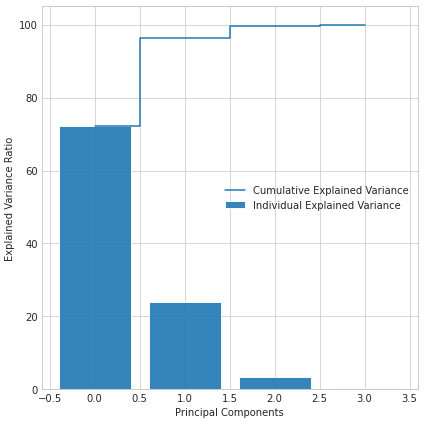

In [130]:
pc=sum(pca.explained_variance_ratio_)
explained_var=[(i/pc)*100 for i in sorted(pca.explained_variance_ratio_,reverse=True)]
exp_cum_var= np.cumsum(explained_var)

with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6,6))

  plt.bar(range(4), explained_var, alpha=0.9, align='center', label='Individual Explained Variance')
  plt.step(range(4),exp_cum_var, where='mid', label='Cumulative Explained Variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principal Components')
  plt.legend(loc='best')
  plt.tight_layout()
          

From the above graph, majority of the variance i.e 72.2% can be elaborated only by the first principal component itself.The second principal component holds 23.97% of the informtion.While the third and fourth principal component comprises of 3.3% and 0.46% of the information reapectively, hence then can be neglected.

In [117]:
featurevector=eigen_vectors[:,:2]
#Prints feature vector.
featurevector

#A feature vector is a vector containing multiple elements about an object. 

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [118]:
featurevector_t=np.transpose(featurevector)
H_t=np.transpose(H)
#Here H is the original dataset.

In [119]:
new_dataset_t=np.matmul(featurevector_t, H_t)
new_dataset=np.transpose(new_dataset_t)

In [120]:
new_dataset.shape
#Returns the shape of the dataset.

(150, 2)

This is the shape of the newly reduced 2D dataset.

In [121]:
#Split data table into data B and species label c
B=df.iloc[:,0:4].values
c=df.iloc[:,4].values

X_std=StandardScaler().fit_transform(B)

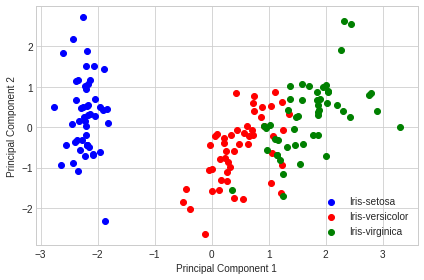

In [122]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    # plot 2D data
    plt.show()
   

This section is just plotting 2 dimensional data. Notice on the graph that the classes seem well separated from each other.

In [123]:
from sklearn.ensemble import RandomForestClassifier
#A random forest is a meta estimator that isused for averaging and to improve the predictive accuracy and control over-fitting.
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
#This code is used for predicting the test set results.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy1= accuracy_score(y_test, y_predict)*100
print('Accuracy of our model using Random Forest Classifier is equal to: ' + str(round(accuracy1, 2)) + ' %.')



[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of our model using Random Forest Classifier is equal to: 100.0 %.


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
 
 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    
cn= confusion_matrix(y_test, y_pred)
print(cn)
accuracy2 = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model using KNN technique is equal to:' + str(round(accuracy2, 2)) + '%.')
 
#Calculating model accuracy:

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy of our model using KNN technique is equal to:96.67%.


In [125]:
from sklearn.svm import SVC

 
 
# SVM Classifier model
svm_clf = SVC()
svm_clf.fit(X_train, y_train) 


# Testing and checking the accuracy
from sklearn.metrics import accuracy_score
 
y_pred1 = svm_clf.predict(X_test)
     
cz= confusion_matrix(y_test, y_pred1)
print(cz)
# Accuracy
accuracy3 = accuracy_score(y_test, y_pred1)*100
print('Accuracy of our model using SVM is equal to: ' + str(round(accuracy3, 2)) + '%.')

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of our model using SVM is equal to: 100.0%.


In [126]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
y_pred2=logisticRegr.predict(X_test)
cx= confusion_matrix(y_test, y_pred2)
print(cx)
# Model accuracy
accuracy4 = accuracy_score(y_test, y_pred2)*100
print('Accuracy of our model using logical regression is equal to:' + str(round(accuracy4, 2)) + '%.')

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of our model using logical regression is equal to:100.0%.


 Thus, we can see that that the accuracy of the model depends on the technique that we are using. 